In [1]:
import pandas as pd
japan_excel_path = 'JPN Data.xlsx'
japan_data = pd.read_excel(japan_excel_path)

# Save it as a CSV file
japan_csv_path = 'JPN_Data.csv'
japan_data.to_csv(japan_csv_path, index=False)


In [2]:
india_excel_path = 'IN_Data.xlsx'
india_data = pd.read_excel(india_excel_path)

# Save it as a CSV file
india_csv_path = 'IN_Data.csv'
india_data.to_csv(india_csv_path, index=False)
japan_data.head()


,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [3]:
# Assuming the conversion rate from JPY to INR is 0.60
conversion_rate = 0.54

# Convert the 'ANN_INCOME' from JPY to INR
japan_data['ANN_INCOME'] = japan_data['ANN_INCOME'] * conversion_rate

In [4]:
japan_data.head(), india_data.head()

(           ID  CURR_AGE GENDER  ANN_INCOME  AGE_CAR  PURCHASE
 0  00001Q15YJ        50      M   240485.76      439         0
 1  00003I71CQ        35      M    58122.36      283         0
 2  00003N47FS        59      F   271504.80      390         1
 3  00005H41DE        43      M   316258.56      475         0
 4  00007E17UM        39      F   381090.24      497         1,
            ID  CURR_AGE GENDER  ANN_INCOME   DT_MAINT
 0  20710B05XL        54      M     1425390 2018-04-20
 1  89602T51HX        47      M     1678954 2018-06-08
 2  70190Z52IP        60      M      931624 2017-07-31
 3  25623V15MU        55      F     1106320 2017-07-31
 4  36230I68CE        32      F      748465 2019-01-27)

In [5]:
japan_data.describe(), india_data.describe()

(          CURR_AGE     ANN_INCOME       AGE_CAR      PURCHASE
 count  40000.00000   40000.000000  40000.000000  40000.000000
 mean      44.99745  194075.394147    359.080250      0.575775
 std       11.82008   94559.001993    203.063724      0.494231
 min       25.00000   37848.060000      1.000000      0.000000
 25%       35.00000  118673.640000    235.000000      0.000000
 50%       45.00000  182334.690000    331.000000      1.000000
 75%       55.00000  250700.940000    444.000000      1.000000
 max       65.00000  431984.160000   1020.000000      1.000000,
            CURR_AGE    ANN_INCOME                       DT_MAINT
 count  70000.000000  7.000000e+04                          70000
 mean      44.995314  1.148679e+06  2018-06-28 16:10:28.662856960
 min       25.000000  3.000330e+05            2016-09-14 00:00:00
 25%       35.000000  8.568238e+05            2018-03-15 00:00:00
 50%       45.000000  1.125152e+06            2018-07-26 00:00:00
 75%       55.000000  1.438676e+06  

In [6]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize column 'A'
japan_data['ANN_INCOME'] = scaler.fit_transform(japan_data[['ANN_INCOME']])
india_data['ANN_INCOME'] = scaler.fit_transform(india_data[['ANN_INCOME']])

In [7]:
india_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,0.692735,2018-04-20
1,89602T51HX,47,M,1.327522,2018-06-08
2,70190Z52IP,60,M,-0.543387,2017-07-31
3,25623V15MU,55,F,-0.106043,2017-07-31
4,36230I68CE,32,F,-1.001917,2019-01-27


In [8]:
japan_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,0.490815,439,0
1,00003I71CQ,35,M,-1.437777,283,0
2,00003N47FS,59,F,0.818858,390,1
3,00005H41DE,43,M,1.292153,475,0
4,00007E17UM,39,F,1.977783,497,1


In [9]:
from datetime import datetime
# Set analysis date
analysis_date = datetime(2019, 7, 1)
# Calculate AGE_CAR for Indian dataset
india_data['DT_MAINT'] = pd.to_datetime(india_data['DT_MAINT'])
india_data['AGE_CAR'] = (analysis_date - india_data['DT_MAINT']).dt.days
# Create AGE_CAR segments
def create_age_car_segment(age_car_days):
    if age_car_days < 200:
        return 1
    elif 200 <= age_car_days <= 360:
        return 2
    elif 360 < age_car_days <= 500:
        return 3
    else:
        return 4
india_data['AGE_CAR_SEGMENT'] = india_data['AGE_CAR'].apply(create_age_car_segment)

In [10]:
X_japan = japan_data[['CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR']]
X_japan['AGE_CAR_SEGMENT'] = X_japan['AGE_CAR'].apply(create_age_car_segment)
y_japan = japan_data['PURCHASE']
# Convert categorical variables to numerical
X_japan = pd.get_dummies(X_japan, columns=['GENDER', 'AGE_CAR_SEGMENT'], drop_first=True)

<ipython-input-10-808305600b99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_japan['AGE_CAR_SEGMENT'] = X_japan['AGE_CAR'].apply(create_age_car_segment)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_japan, y_japan, test_size=0.2, random_state=42)

# Train the classification model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
import numpy as np

# Assuming the logistic regression model is already trained as 'model'
coefficients = model.coef_[0]
features = X_japan.columns

# Create a DataFrame to show the coefficients and their corresponding features
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Calculate the odds ratios
coeff_df['Odds Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Odds Ratio', ascending=False)
print(coeff_df)


             Feature  Coefficient  Odds Ratio
6  AGE_CAR_SEGMENT_4     2.146569    8.555457
5  AGE_CAR_SEGMENT_3     1.856713    6.402660
1         ANN_INCOME     0.419857    1.521743
4  AGE_CAR_SEGMENT_2     0.224605    1.251828
3           GENDER_M     0.213214    1.237650
2            AGE_CAR     0.000194    1.000194
0           CURR_AGE    -0.009943    0.990106


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.68625
Confusion Matrix:
 [[2326 1023]
 [1487 3164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      3349
           1       0.76      0.68      0.72      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.69      0.68      8000
weighted avg       0.69      0.69      0.69      8000



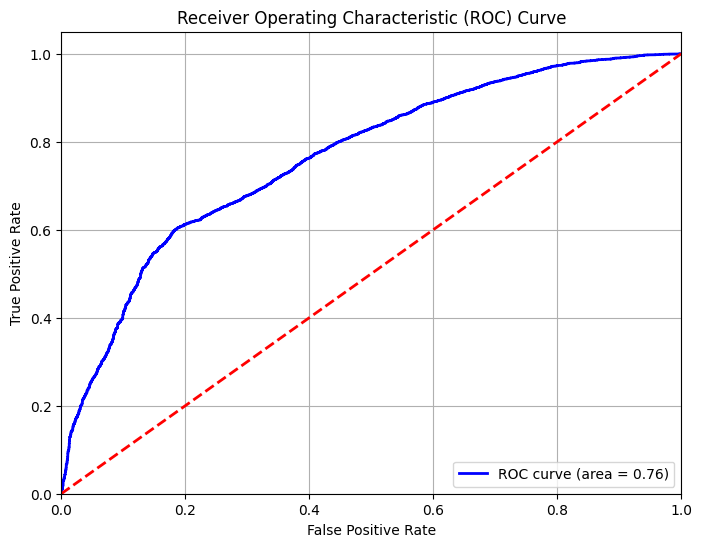

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming the logistic regression model is already trained and we have the test set
# If not, load the model and test set accordingly

# Predict probabilities for the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [15]:

# Predict potential customers in the Indian market
X_india = india_data[['CURR_AGE', 'GENDER', 'ANN_INCOME','AGE_CAR','AGE_CAR_SEGMENT']]
X_india = pd.get_dummies(X_india, columns=['GENDER', 'AGE_CAR_SEGMENT'], drop_first=True)
india_predictions = model.predict(X_india)
india_data['POTENTIAL_CUSTOMER'] = india_predictions

# Count potential customers
potential_customers_count = india_data['POTENTIAL_CUSTOMER'].sum()
print("Potential customers in the Indian market:", potential_customers_count)


Potential customers in the Indian market: 39046
